# PyTorch - A Quick Walkthrough

[PyTorch](https://pytorch.org/) is a Python library for numerical computing and neural networks. Notably, it supports the automatic differentiation behavior that we discussed in class. What does this mean? It means that you can set up arbitrarily complex computational graphs, and PyTorch will take care of differentiating their contents.

## 1. Installation!

Installation is simple, and can be done using either Pip or Anaconda. The PyTorch homepage has a [helpful installation](https://pytorch.org/#pip-install-pytorch) tool that will help you figure out what the right way will be to install it on your system.

In [1]:
!pip install torch

You are using pip version 18.0, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Once you've got PyTorch installed, import it:

In [2]:
import torch

## 2. First steps

They key data structure in PyTorch is the [`Tensor`](https://pytorch.org/docs/stable/tensors.html), which represents a tensor (loosely, a matrix of arbitrary dimension) that keeps track of its own gradient and can be part of a computational graph:

In [3]:
r = torch.rand(4)
r

tensor([0.5004, 0.8656, 0.1164, 0.6271])

Here, we see that we have created a tensor, populated with 4 random numbers. Each tensor has a `size` attribute, indicating its dimensionality:

In [4]:
r.size()

torch.Size([4])

This tensor has one dimension, and has 4 elements in that single dimension. We can create a multidimensional random tensor like so:

In [5]:
r2 = torch.rand(2, 4) # make a random 2x4 matrix
r2

tensor([[0.1954, 0.9334, 0.1167, 0.2486],
        [0.5250, 0.5486, 0.6245, 0.0106]])

This tensor has _two_ dimensions:

In [6]:
r2.size()

torch.Size([2, 4])

It is possible to create a tensor directly from already-existing data:

In [7]:
some_data = [1,2,3,4]
some_tensor = torch.tensor(some_data)
some_tensor.size()

torch.Size([4])

In [8]:
torch.tensor([[1,2,3]]).size()

torch.Size([1, 3])

This works with numpy data, as well:

In [9]:
import numpy as np
numpy_random = np.random.randint(4, size=10)
numpy_random

array([3, 2, 1, 0, 2, 2, 2, 0, 0, 2])

In [10]:
torch.tensor(numpy_random)

tensor([3, 2, 1, 0, 2, 2, 2, 0, 0, 2])

In [11]:
torch.from_numpy(numpy_random)

tensor([3, 2, 1, 0, 2, 2, 2, 0, 0, 2])

Tensors can go _back_ into numpy, if for some reason you need that:

In [12]:
some_tensor.numpy()

array([1, 2, 3, 4])

Mostly, this is un-necessary, as PyTorch tensors support much of the same functionality as Numpy arrays.

In [13]:
some_tensor.sum()

tensor(10)

In [14]:
some_tensor.sum().shape

torch.Size([])

In [15]:
some_tensor.sum().unsqueeze(0)

tensor([10])

In [16]:
torch.tensor([[[[3]]]]).squeeze()

tensor(3)

Tensors can have data types, specified very similarly to how it is done in Numpy:

In [17]:
float_tensor = torch.tensor([1,2,3], dtype=torch.float32)

In [18]:
float_tensor.double()

tensor([1., 2., 3.], dtype=torch.float64)

Some functionality is only implemented on certain types:

In [19]:
float_tensor.log()

tensor([0.0000, 0.6931, 1.0986])

In [20]:
some_tensor.log() # this won't work

RuntimeError: "log" not implemented for 'torch.LongTensor'

In [21]:
some_tensor.float().log()

tensor([0.0000, 0.6931, 1.0986, 1.3863])

We can, of course, do arithemtic with tensors:

In [22]:
a = torch.tensor([1.0, 2.3, 4.6])
b = torch.tensor([0.5, 0.25, 1.0])
a-b

tensor([0.5000, 2.0500, 3.6000])

Notably, if you are using a GPU, tensors can be transparently used on either the CPU or the GPU; memory allocation, etc. will all be done automatically, and if the arithmetic operations you are requesting are available in CUDA, the appropriate kernel will be run for you.

Numpy-style array sicing works, and in multiple dimensions:

In [23]:
r3 = torch.rand(4,6)
r3

tensor([[0.1597, 0.6460, 0.8195, 0.2139, 0.8933, 0.0634],
        [0.2876, 0.7677, 0.6954, 0.3711, 0.4428, 0.4030],
        [0.6695, 0.3296, 0.1785, 0.9174, 0.7979, 0.1513],
        [0.6871, 0.3646, 0.7385, 0.4903, 0.7017, 0.3219]])

In [24]:
r3[1,:]

tensor([0.2876, 0.7677, 0.6954, 0.3711, 0.4428, 0.4030])

In [25]:
r3[:,2]

tensor([0.8195, 0.6954, 0.1785, 0.7385])

In [26]:
r3[-1]

tensor([0.6871, 0.3646, 0.7385, 0.4903, 0.7017, 0.3219])

Matrix and vector operations are, of course supported:

In [27]:
a = torch.tensor([1,2,3,4])
b = torch.tensor([1,2,3,4])
a * b

tensor([ 1,  4,  9, 16])

In [28]:
c = torch.tensor([[5,6,7,8]]) # a 1x4 matrix
c * a

tensor([[ 5, 12, 21, 32]])

We can use the `unsqueeze()` function to turn vectors into matrices:

In [29]:
a_mat = a.unsqueeze(0)
a_mat

tensor([[1, 2, 3, 4]])

In [30]:
print(f"a_mat.shape: {a_mat.shape}")
print(f"c.shape: {c.shape}")

a_mat.shape: torch.Size([1, 4])
c.shape: torch.Size([1, 4])


In [31]:
a_mat.t() @ c

tensor([[ 5,  6,  7,  8],
        [10, 12, 14, 16],
        [15, 18, 21, 24],
        [20, 24, 28, 32]])

If you don't want to or can't use Python 3's matrix multiplication operator, there is a `matmul` function:

In [32]:
a_mat.t().matmul(c)

tensor([[ 5,  6,  7,  8],
        [10, 12, 14, 16],
        [15, 18, 21, 24],
        [20, 24, 28, 32]])

A variety of "reduction" operators are included, as well:

In [33]:
a.sum()

tensor(10)

In [34]:
a.argmax()

tensor(3)

In [35]:
a.max()

tensor(4)

Putting things together:

In [36]:
a_dot_b = (a * b).sum()
a_dot_b

tensor(30)

Of course, dot (inner) product is also included:

In [37]:
a.dot(b)

tensor(30)

## 3. Gradients

One notable thing about PyTorch tensors (and PyTorch's various arithmetic operators!) is that they keep track of their gradients. This is, of course, important for neural network training!

In [38]:
x = torch.tensor(1.0, requires_grad=True)
y = torch.tensor(2.0, requires_grad=True)
z = torch.tensor(0.0, requires_grad=True)

In [39]:
a = x + y
b = torch.max(y, z)
f = a * b

In [40]:
f

tensor(6., grad_fn=<MulBackward0>)

In [41]:
f.retain_grad() # tell PyTorch to retain gradients from f's computational history
f.backward() # calculate gradients relative to f

In [42]:
a

tensor(3., grad_fn=<AddBackward0>)

In [43]:
print(f.grad) # df/df

tensor(1.)


In [44]:
x.grad # df/dx

tensor(2.)

In [45]:
y.grad # df/dy

tensor(5.)

In [46]:
z.grad # df/dz

tensor(0.)

One thing you'll note is that PyTorch goes out of its way to be efficient- for a large network, keeping around all gradients would quickly become prohibitive in terms of memory usage, so by default it only keeps around the bare minimum.

## 4. Optimization

Let's try implementing a multinomial logistic regression classifier. Recall that logistic regression looks like so:

$$\hat{y} = \frac{e^{x*w_c^T+b}}{\sum^{C}_{j=1}e^{x*w_j^T+b}}$$

This is equivalent to:

$$\hat{y}=\log \text{softmax}(w^T*x+b)$$

We need to learn the parameters of the matrix $w$ and bias term $b$, and do so by minimizing the negativel log-likelihood of $\hat{y}$.

PyTorch comes with implementations of several optimization algorithms that we can use!

In [47]:
from sklearn import datasets


In [91]:
iris = datasets.load_iris()
iris_x = iris['data']
iris_y = iris['target']
iris_x.shape

(150, 4)

In [49]:
iris_x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [92]:
iris_y.shape

(150,)

In [89]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
np.unique(iris_y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

Setting up a 75/25 train/test split:

In [51]:
train_idx = np.arange(iris_x.shape[0]) % 4 != 0 # get an array where every fourth item is marked for inclusion in test
iris_x_train_np, iris_y_train_np = iris_x[train_idx, :], iris_y[train_idx]
iris_x_test_np, iris_y_test_np = iris_x[~train_idx, :], iris_y[~train_idx]

We can turn these straight into PyTorch tensors:

In [52]:
iris_x_train, iris_y_train = torch.from_numpy(iris_x_train_np), torch.from_numpy(iris_y_train_np)
iris_x_test, iris_y_test = torch.from_numpy(iris_x_test_np), torch.from_numpy(iris_y_test_np)

Note that `from_numpy()` by default matches `dtype`:

In [53]:
iris_x_test_np.dtype

dtype('float64')

In [54]:
iris_x_test.dtype

torch.float64

In [96]:
iris_x_train

tensor([[4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000, 0.5000],
        [5.0000, 3.0000, 1.6000, 0.2000],
        [5.0000, 3.4000, 1.6000, 0.4000],
        [5.2000, 3.5000, 1.5000, 0.2000],
        [4.7000, 3.2000, 1.6000, 0.2000],
        [4.8000, 3.1000, 1.6000, 0.2000],
        [5.4000, 3.4000, 1.5000, 0

In [95]:
iris_y_train

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Now, we can set up our parameters, starting with a random initialization:

In [55]:
w = torch.rand(3,4, dtype=torch.float64)
b = torch.rand(3, dtype=torch.float64)

And let's set up a loss function, as well as import a utility function package:

In [56]:
w

tensor([[0.3323, 0.4908, 0.2774, 0.8495],
        [0.2168, 0.0769, 0.5469, 0.2591],
        [0.7348, 0.0870, 0.2629, 0.6348]], dtype=torch.float64)

In [57]:
b

tensor([0.3428, 0.2846, 0.4459], dtype=torch.float64)

In [58]:
loss_func = torch.nn.NLLLoss() # negative log likelihood loss- PyTorch comes with many others out of the box

import torch.nn.functional as F

The overall procedure will be:

1. Make a prediction
2. Compute loss
3. Update
4. Repeat

Let's see what that looks like for one run:

In [59]:
z = iris_x_train @ w.t() + b
y_hat = F.log_softmax(z, dim=1)

We can verify that this worked:

In [60]:
y_hat[0].exp().sum() # should be 1.0

tensor(1.0000, dtype=torch.float64)

In [99]:
y_hat

tensor([[-0.1438, -2.0703, -4.8568],
        [-0.1026, -2.3849, -5.2270],
        [-0.1473, -2.0608, -4.6433],
        [-0.0767, -2.6517, -5.7194],
        [-0.0962, -2.4514, -5.1864],
        [-0.1016, -2.3896, -5.3083],
        [-0.1386, -2.1040, -4.8991],
        [-0.0700, -2.7324, -5.9875],
        [-0.1161, -2.2745, -5.0027],
        [-0.0999, -2.4143, -5.1773],
        [-0.0334, -3.4380, -7.2778],
        [-0.0327, -3.4641, -7.0604],
        [-0.0831, -2.5760, -5.6205],
        [-0.0813, -2.5880, -5.8282],
        [-0.0659, -2.7967, -5.8793],
        [-0.0774, -2.6467, -5.6378],
        [-0.0446, -3.1717, -6.3696],
        [-0.1630, -1.9653, -4.5785],
        [-0.1809, -1.8657, -4.5405],
        [-0.1246, -2.2074, -4.9410],
        [-0.0894, -2.5046, -5.5713],
        [-0.1471, -2.0617, -4.6554],
        [-0.1637, -1.9617, -4.5690],
        [-0.1079, -2.3273, -5.3591],
        [-0.0341, -3.4234, -7.0165],
        [-0.1445, -2.0685, -4.8125],
        [-0.0893, -2.5047, -5.5913],
 

In [100]:
iris_y_train


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Next, compute loss.  The loss functions in PyTorch are a bit finicky about their dimensions- the key is that the prediction must be $N \times C$, and the target must be $N$.

In [61]:
loss_func(y_hat[0].unsqueeze(0), iris_y_train[0].unsqueeze(0))

tensor(1.2320, dtype=torch.float64)

If we're not pulling out individual items, it's all a lot easier:

In [62]:
loss_func(y_hat[:4], iris_y_train[:4])

tensor(1.1411, dtype=torch.float64)

And we can compute it on an entire training set at once:

In [63]:
loss_func(y_hat, iris_y_train)

tensor(1.4790, dtype=torch.float64)

Let's look at that loss function for the subset of the data that was correct:

In [64]:
loss_func( y_hat[:37], iris_y_train[:37])

tensor(1.1327, dtype=torch.float64)

In [65]:
y_hat.argmax(dim=1)

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

We've got our loss calculation, but it would be helpful to have a way to evaluate our parameter's accuracy as well:

In [66]:
def eval_acc(y_hat_, y_):
    n_correct = (y_hat_.argmax(dim=1) == y_).sum().float()
    n_total = float(len(y_))
    return (n_correct / n_total).item()
    

In [67]:
eval_acc(y_hat, iris_y_train)

0.3303571343421936

This makes sense, since we are working with random weights- we'd expect to get chance accuracy. Let's try optimizing our parameters!

Now, we set up an optimizer and training loop:

In [68]:
# re-initialize our parameters, this time making sure that they keep track of their gradients:

w = torch.rand(3,4, dtype=torch.float64, requires_grad=True)
b = torch.rand(3, dtype=torch.float64, requires_grad=True)

sgd_opt = torch.optim.SGD([w, b], lr=0.01) # can experiment with different learning rates

num_epochs = 1000

stored_perf = [] # for graphing our progress

for i in range(num_epochs):
    
    sgd_opt.zero_grad() # erase any gradients our optimizer might remember
    
    # do a forward pass through our data:
    z = iris_x_train @ w.t() + b
    y_hat = F.log_softmax(z, dim=1)
    
    loss = loss_func(y_hat, iris_y_train)
    
    # send back gradients:
    loss.backward()
    
    # now, tell the optimizer to update our weights:
    sgd_opt.step()

    epoch_acc = eval_acc(y_hat, iris_y_train)
    
    # also compute loss on our test data
    y_hat_test = F.log_softmax(iris_x_test @ w.t() + b, dim=1)
    loss_test = loss_func(y_hat_test, iris_y_test)
    acc_test = eval_acc(y_hat_test, iris_y_test)
    
    stored_perf.append([i, loss.item(), epoch_acc, loss_test.item(), acc_test])
    
    # print out how we're doing:
    if i % 100 == 0:
        print(f"epoch {i}, training loss: {loss}, train acc: {eval_acc(y_hat, iris_y_train)}")

epoch 0, training loss: 2.4355409546889577, train acc: 0.3392857015132904
epoch 100, training loss: 0.76661684472197, train acc: 0.8035714030265808
epoch 200, training loss: 0.5982738852791666, train acc: 0.8482142686843872
epoch 300, training loss: 0.5238055790659826, train acc: 0.8928571343421936
epoch 400, training loss: 0.47975299213713335, train acc: 0.9017857313156128
epoch 500, training loss: 0.4489650463638898, train acc: 0.9285714030265808
epoch 600, training loss: 0.425228178926021, train acc: 0.9464285969734192
epoch 700, training loss: 0.40578188402154297, train acc: 0.9553571343421936
epoch 800, training loss: 0.38921296633362507, train acc: 0.9553571343421936
epoch 900, training loss: 0.3747185777873843, train acc: 0.9732142686843872


Let's make a few plots, just for fun:

In [69]:
%matplotlib inline

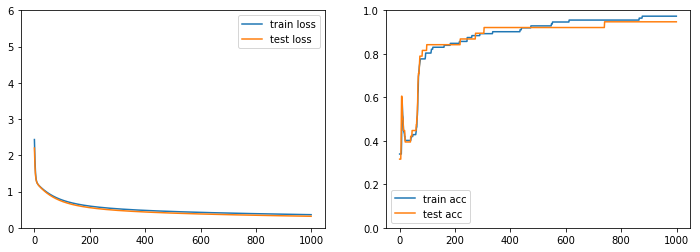

In [70]:
import pandas as pd
from pylab import plt

perf_df = pd.DataFrame(stored_perf, columns=["epoch","train loss","train acc", "test loss", "test acc"])
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
perf_df[["train loss", "test loss"]].plot(ax=ax1);
perf_df[["train acc", "test acc"]].plot(ax=ax2);
ax1.set_ylim([0,6]);
ax2.set_ylim([0,1]);
plt.show()

## 5. Organization

PyTorch has built-in classes to do a lot of this work for us. For very simple models like the one above, it doesn't make a huge difference, but as models grow in complexity, it can be extremely helpful!

For example, instead of manually performing the matrix multiplication and bias addition, we can use the `linear()` function from `torch.nn.functional`:

In [71]:
z = F.linear(iris_x_train, w, bias=b)
y_hat = F.log_softmax(z, dim=1)

Another option is to use the `nn` package's classes to wrap our model functionality:

In [72]:
import torch.nn as nn

In [73]:
# since our data is coming from Numpy, and it defaults to doubles, we need to tell our model to match:
linear_layer = nn.Linear(4,3).double() # input features, output features

In [74]:
sgd_opt = torch.optim.SGD(linear_layer.parameters(), lr=0.01)

num_epochs = 1000

for i in range(num_epochs):
    
    sgd_opt.zero_grad() # erase any gradients our optimizer might remember
    
    # do a forward pass through our data:
    z = linear_layer(iris_x_train)
    y_hat = F.log_softmax(z, dim=1)
    
    loss = loss_func(y_hat, iris_y_train)
    
    # send back gradients:
    loss.backward()
    
    # now, tell the optimizer to update our weights:
    sgd_opt.step()

    epoch_acc = eval_acc(y_hat, iris_y_train)
    
    # print out how we're doing:
    if i % 100 == 0:
        print(f"epoch {i}, training loss: {loss}, train acc: {eval_acc(y_hat, iris_y_train)}")

epoch 0, training loss: 1.97799011248781, train acc: 0.3303571343421936
epoch 100, training loss: 0.6658864987872504, train acc: 0.8035714030265808
epoch 200, training loss: 0.5623656898579767, train acc: 0.8482142686843872
epoch 300, training loss: 0.5070933545641688, train acc: 0.9017857313156128
epoch 400, training loss: 0.47061457750143226, train acc: 0.9107142686843872
epoch 500, training loss: 0.4434213404065468, train acc: 0.9553571343421936
epoch 600, training loss: 0.4216054005825045, train acc: 0.9642857313156128
epoch 700, training loss: 0.40327153717665226, train acc: 0.9642857313156128
epoch 800, training loss: 0.3873850923950462, train acc: 0.9642857313156128
epoch 900, training loss: 0.37332812314944136, train acc: 0.9732142686843872


If we had more going on our model, this would ake for cleaner code. We can get even more modular, but using the `nn.Module` class to group layers and functions. Note that our `Module` is just a Python class, so we can e.g. specify parameters for network dimensionality, etc.

In [75]:
class LogReg(nn.Module):
    def __init__(self, input_dims, output_classes):
        super(LogReg, self).__init__()
        self.linear = nn.Linear(input_dims, output_classes)
    
    def forward(self, x):
        z = self.linear(x)
        return F.log_softmax(z, dim=1)

Now we can use our `LogReg` class just like we did when we were just using `Linear` directly:

In [76]:
log_reg = LogReg(4,3).double()

list(log_reg.parameters())

[Parameter containing:
 tensor([[ 0.3116, -0.1745,  0.4227, -0.3844],
         [ 0.4475, -0.4064, -0.2678, -0.1543],
         [-0.0024, -0.3775,  0.4051, -0.3182]], dtype=torch.float64,
        requires_grad=True), Parameter containing:
 tensor([-0.2197, -0.0317, -0.1947], dtype=torch.float64, requires_grad=True)]

In [102]:
log_reg = LogReg(4,3).double()

sgd_opt = torch.optim.SGD(log_reg.parameters(), lr=0.01)

num_epochs = 1000

for i in range(num_epochs):
    
    sgd_opt.zero_grad() # erase any gradients our optimizer might remember
    
    # do a forward pass through our data:
    y_hat = log_reg(iris_x_train) # note that we don't need to call softmax here anymore!
    #print(y_hat.size())
    #print(iris_y_train.size())
    
    loss = loss_func(y_hat, iris_y_train)
    #print(y_hat)
    #print(iris_y_train)
    #print(loss)
    
    # send back gradients:
    loss.backward()
    
    # now, tell the optimizer to update our weights:
    sgd_opt.step()

    epoch_acc = eval_acc(y_hat, iris_y_train)
    
    # print out how we're doing:
    if i % 100 == 0:
        print(f"epoch {i}, training loss: {loss}, train acc: {eval_acc(y_hat, iris_y_train)}")

epoch 0, training loss: 3.7351197690225066, train acc: 0.3303571343421936
epoch 100, training loss: 0.7173455341772231, train acc: 0.6964285969734192
epoch 200, training loss: 0.5933143554042346, train acc: 0.7946428656578064
epoch 300, training loss: 0.5313941587394178, train acc: 0.8571428656578064
epoch 400, training loss: 0.4916220408056237, train acc: 0.8928571343421936
epoch 500, training loss: 0.4622516501145401, train acc: 0.9196428656578064
epoch 600, training loss: 0.43874522578161923, train acc: 0.9196428656578064
epoch 700, training loss: 0.41898942335373845, train acc: 0.9464285969734192
epoch 800, training loss: 0.4018601388459532, train acc: 0.9553571343421936
epoch 900, training loss: 0.38669648900825, train acc: 0.9642857313156128


If we had a more complex model, we could encapsulate it and protect the rest of our code from knowing about it:

In [80]:
class MLP(nn.Module):
    def __init__(self, input_dims, hidden_dims, output_classes):
        super(MLP, self).__init__()
        
        self.h1 = nn.Linear(input_dims, hidden_dims)
        self.activation = nn.Tanh()
        self.h2 = nn.Linear(hidden_dims, output_classes)
    
        
    def forward(self, x):
        out = self.h1(x)
        out = self.activation(out) # transform to representation space
        out = self.h2(out) # perform classification on representation
        return F.log_softmax(out, dim=1)

`Module`s can contain other `Module`s, and so on. Note that we use it _exactly_ as before. Through the magic of class inheritance, PyTorch knows how to take the gradient of all of the individual pieces in our model, and it all Just Works.

In [81]:
mlp = MLP(4, 6, 3).double() # six hidden dims?

sgd_opt = torch.optim.SGD(mlp.parameters(), lr=0.01)

num_epochs = 1000

for i in range(num_epochs):
    
    sgd_opt.zero_grad() # erase any gradients our optimizer might remember
    
    # do a forward pass through our data:
    y_hat = mlp(iris_x_train) # note that we don't need to call softmax here anymore!
    
    loss = loss_func(y_hat, iris_y_train)
    
    # send back gradients:
    loss.backward()
    
    # now, tell the optimizer to update our weights:
    sgd_opt.step()

    epoch_acc = eval_acc(y_hat, iris_y_train)
    
    # print out how we're doing:
    if i % 100 == 0:
        print(f"epoch {i}, training loss: {loss}, train acc: {eval_acc(y_hat, iris_y_train)}")

epoch 0, training loss: 1.2584830647253857, train acc: 0.3392857015132904
epoch 100, training loss: 0.9672437720063664, train acc: 0.6696428656578064
epoch 200, training loss: 0.7861567372903647, train acc: 0.625
epoch 300, training loss: 0.6589137083786334, train acc: 0.7678571343421936
epoch 400, training loss: 0.5820176319301217, train acc: 0.8035714030265808
epoch 500, training loss: 0.5207996661037981, train acc: 0.9017857313156128
epoch 600, training loss: 0.48482900852156346, train acc: 0.9375
epoch 700, training loss: 0.4564611892110889, train acc: 0.9464285969734192
epoch 800, training loss: 0.43010366494617597, train acc: 0.9642857313156128
epoch 900, training loss: 0.4042284604935796, train acc: 0.9642857313156128


## 6. Text!

Let's try training a simple LSTM to do language identification. Since the point of this lab is about PyTorch and not data wrangling, I've encaspulated some code to download and process the data, and put it in a separate file; in the assignment, you will write your own versions of this code. Since you don't have that file, this part of the notebook cannot be run as-is, and so I have left the output in here as an illustration.

In [82]:
import pandas as pd

In [83]:
df = pd.read_csv("merged.csv")
print(len(df))
df.head()

FileNotFoundError: File b'merged.csv' does not exist

In [3]:
from importlib import reload
from util import prep_data

In [4]:
c2i, i2c = prep_data.build_char_vocab(df)
l2i, i2l = prep_data.build_label_vocab(df)

In [5]:
some_sentence = df.head().iloc[0].sentence

In [6]:
prep_data.sentence2tensor(some_sentence, c2i)

tensor([ 0,  1,  2,  3,  4,  5,  6,  6,  7,  6,  7,  4,  8,  9, 10,  6,  9,  5,
         6,  4, 11,  9,  4, 12,  6, 13, 14,  4, 12,  6,  2,  4, 15, 16, 11, 12,
         4, 12,  6,  2,  4, 12,  9, 10,  6, 15,  9,  2, 17, 18])

In [8]:
[prep_data.sentence2tensor(s, c2i) for s in df[:1].sentence]

[tensor([ 0,  1,  2,  3,  4,  5,  6,  6,  7,  6,  7,  4,  8,  9, 10,  6,  9,  5,
          6,  4, 11,  9,  4, 12,  6, 13, 14,  4, 12,  6,  2,  4, 15, 16, 11, 12,
          4, 12,  6,  2,  4, 12,  9, 10,  6, 15,  9,  2, 17, 18])]

We'll set up a simple model:

In [36]:
reload(prep_data)
li = prep_data.LangID(len(c2i), 10, 20, len(l2i))

Now, query it on our sample sentence:

In [11]:
z = li(prep_data.sentence2tensor(some_sentence, c2i).unsqueeze(0))

Note that these are log-probabilities; let's exponentiate to see real-space probabilities:

In [12]:
z.exp()

tensor([0.5639, 0.4361], grad_fn=<ExpBackward>)

Since we have not trained our model, the results here should be pretty random. Let's train using the [ADAM optimizer](https://arxiv.org/abs/1412.6980) (Kingma & Ba, 2015). The process is virtually identical to what we did for our logistic regression model above:

In [13]:
import random
import torch

In [37]:
adam_opt = torch.optim.Adam(li.parameters())

num_epochs = 1
batch_size = 100

loss_func = torch.nn.NLLLoss() # since our model gives negative log probs on the output side

for i in range(num_epochs):
    
    training_data_x = df.sentence.values
    training_data_y = df.lang.values
    
    pairs = list(zip(training_data_x, training_data_y))
    random.shuffle(pairs)
    

    adam_opt.zero_grad() # erase any gradients our optimizer might remember
    loss = 0
    
    for x_idx, (x, y) in enumerate(pairs):
        
        if x_idx % batch_size == 0 and x_idx > 0:
            adam_opt.zero_grad()
            
        
        x_tens = prep_data.sentence2tensor(x, c2i).unsqueeze(0)
        
        y_hat = li(x_tens)
        
        y_tens = torch.tensor(l2i[y])
        
        loss += loss_func(y_hat.unsqueeze(0), y_tens.unsqueeze(0))
    
        if x_idx % 1000 == 0:
            print(f"per-item loss: {loss.float() / batch_size}, {x_idx}/{len(pairs)}")
    
        # send back gradients:
        if x_idx % batch_size == 0 and x_idx > 0:
            loss.backward()
            # now, tell the optimizer to update our weights:
            adam_opt.step()
            loss = 0
        


per-item loss: 0.007963231764733791, 0/20000
per-item loss: 0.6847856640815735, 1000/20000
per-item loss: 0.6775606274604797, 2000/20000
per-item loss: 0.6763826012611389, 3000/20000
per-item loss: 0.6502791047096252, 4000/20000
per-item loss: 0.6426841616630554, 5000/20000
per-item loss: 0.6270484924316406, 6000/20000
per-item loss: 0.6044856905937195, 7000/20000
per-item loss: 0.5271546840667725, 8000/20000
per-item loss: 0.48755383491516113, 9000/20000
per-item loss: 0.39829960465431213, 10000/20000
per-item loss: 0.39431822299957275, 11000/20000
per-item loss: 0.39963480830192566, 12000/20000
per-item loss: 0.31801536679267883, 13000/20000
per-item loss: 0.280678927898407, 14000/20000
per-item loss: 0.240852952003479, 15000/20000
per-item loss: 0.20132911205291748, 16000/20000
per-item loss: 0.26558351516723633, 17000/20000
per-item loss: 0.28937503695487976, 18000/20000
per-item loss: 0.22459350526332855, 19000/20000


Try it out on an English sentence:

In [54]:
with torch.no_grad():
    lang_probs = li(prep_data.sentence2tensor("hello this is an English sentence", c2i).unsqueeze(0))
    print(lang_probs)

tensor([-0.0690, -2.7084])


In [39]:
i2l[lang_probs.argmax().item()]

'eng'

And on a Spanish one:

In [55]:
lang_probs = li(prep_data.sentence2tensor("¡Hola! Español es un idioma muy interesante", c2i).unsqueeze(0))
lang_probs

tensor([-1.4572, -0.2651], grad_fn=<SelectBackward>)

In [56]:
i2l[lang_probs.argmax().item()]

'spa'

Note that in the implementation I've demonstrated here, I'm initializing the RNN's hidden state with random noise. This can help speed up training and improve accuracy, but it does mean that inference is not determinstic- meaning that the same input may give slightly different results.